In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import os

In [4]:
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, 'data')
OUTPUT_DIR = os.path.join(BASE_DIR, 'outputs')

In [6]:

nltk.download('stopwords')


# 데이터 로드
data_path = os.path.join(DATA_DIR, "train.csv")
df = pd.read_csv(data_path)

# 기본 정보 확인
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      2800 non-null   object
 1   text    2800 non-null   object
 2   target  2800 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 65.8+ KB
None
            target
count  2800.000000
mean      3.010714
std       2.003719
min       0.000000
25%       1.000000
50%       3.000000
75%       5.000000
max       6.000000
                    ID                              text  target
0  ynat-v1_train_00000  정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보       4
1  ynat-v1_train_00001       K찰.국DLwo 로L3한N% 회장 2 T0&}송=       3
2  ynat-v1_train_00002            m 김정) 자주통일 새,?r열1나가야1보       2
3  ynat-v1_train_00003     갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩       5
4  ynat-v1_train_00004      pI美대선I앞두고 R2fr단 발] $비해 감시 강화       6


[nltk_data] Downloading package stopwords to
[nltk_data]     /data/ephemeral/home/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


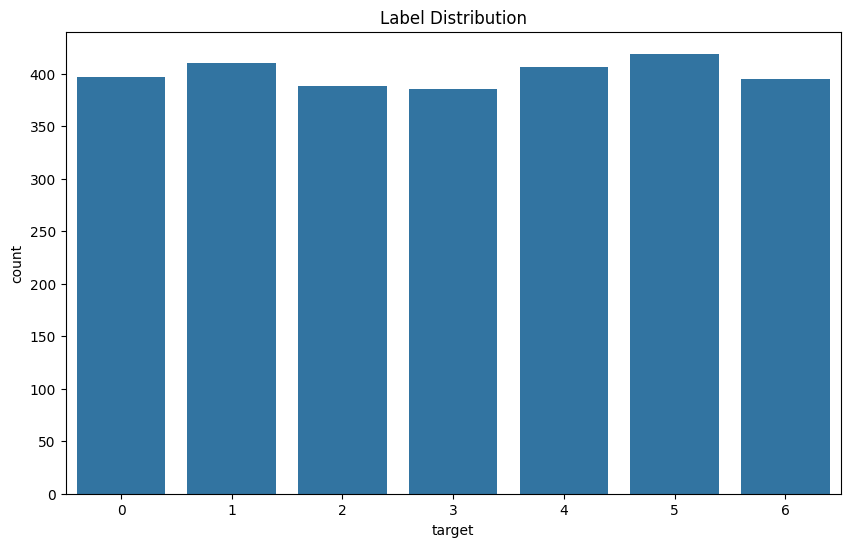

In [8]:

# 레이블 분포 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df)
plt.title('Label Distribution')
plt.show()


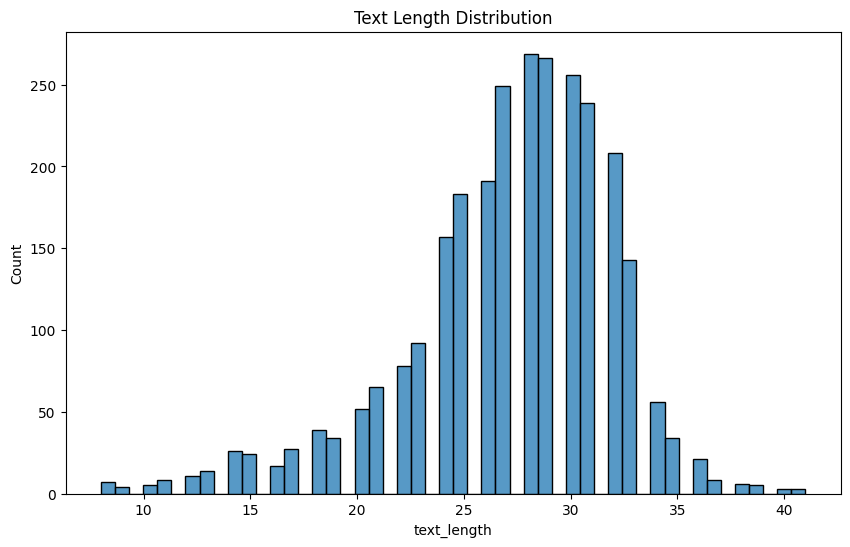

In [9]:

# 텍스트 길이 분석
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50)
plt.title('Text Length Distribution')
plt.show()


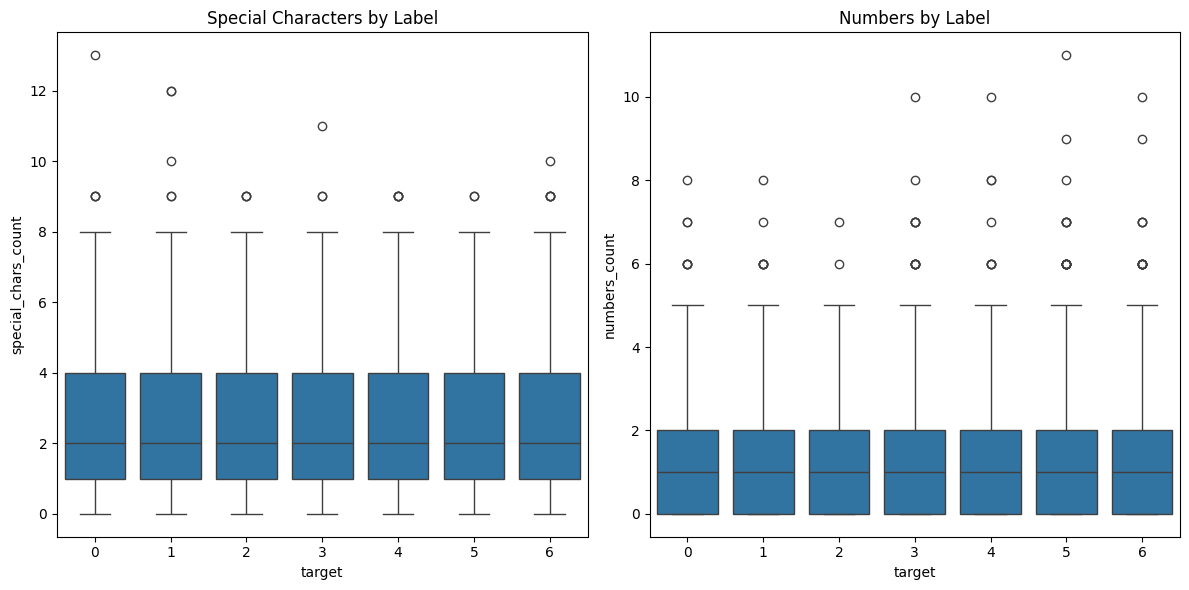

In [11]:

# 특수 문자 및 숫자 분석
def count_special_chars(text):
    return len(re.findall(r'[^\w\s]', text))

def count_numbers(text):
    return len(re.findall(r'\d', text))

df['special_chars_count'] = df['text'].apply(count_special_chars)
df['numbers_count'] = df['text'].apply(count_numbers)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='target', y='special_chars_count', data=df)
plt.title('Special Characters by Label')
plt.subplot(1, 2, 2)
sns.boxplot(x='target', y='numbers_count', data=df)
plt.title('Numbers by Label')
plt.tight_layout()
plt.show()


In [12]:

# 가장 흔한 특수 문자 확인
all_special_chars = ''.join(re.findall(r'[^\w\s]', ' '.join(df['text'])))
print("Most common special characters:")
print(Counter(all_special_chars).most_common(10))


Most common special characters:
[('…', 901), ('.', 404), ('·', 349), ('%', 245), ('"', 196), ('-', 195), ('(', 190), ('|', 187), ('?', 186), (',', 185)]


In [13]:

# 텍스트 정제 함수
def clean_text(text):
    # 특수 문자 제거 (한글, 영문, 숫자만 남김)
    text = re.sub(r'[^\w\s가-힣]', '', text)
    # 불필요한 공백 제거
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# 정제 전후 텍스트 비교
print(df[['text', 'cleaned_text']].head())

# 워드 클라우드 생성 (전체 데이터)
wordcloud = WordCloud(font_path='/path/to/your/korean/font.ttf', width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Texts')
plt.show()

# 레이블별 워드 클라우드
for label in df['label'].unique():
    text = ' '.join(df[df['label'] == label]['cleaned_text'])
    wordcloud = WordCloud(font_path='/path/to/your/korean/font.ttf', width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label {label}')
    plt.show()

# 가장 흔한 단어 분석
def get_top_words(text, n=20):
    words = text.split()
    return Counter(words).most_common(n)

print("Top 20 words in the entire dataset:")
print(get_top_words(' '.join(df['cleaned_text'])))

# 레이블별 가장 흔한 단어
for label in df['label'].unique():
    text = ' '.join(df[df['label'] == label]['cleaned_text'])
    print(f"\nTop 20 words for Label {label}:")
    print(get_top_words(text))

# 중복 데이터 확인
duplicates = df[df.duplicated(['text'])]
print(f"\nNumber of duplicate texts: {len(duplicates)}")

# 레이블별 평균 텍스트 길이
avg_length_by_label = df.groupby('label')['text_length'].mean()
print("\nAverage text length by label:")
print(avg_length_by_label)

# 상관관계 분석
correlation = df[['label', 'text_length', 'special_chars_count', 'numbers_count']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

                               text                   cleaned_text
0  정i :파1 미사z KT( 이용기간 2e 단] Q분종U2보  정i 파1 미사z KT 이용기간 2e 단 Q분종U2보
1       K찰.국DLwo 로L3한N% 회장 2 T0&}송=         K찰국DLwo 로L3한N 회장 2 T0송
2            m 김정) 자주통일 새,?r열1나가야1보            m 김정 자주통일 새r열1나가야1보
3     갤노트8 주말 27만대 개통…시장은 불법 보조금 얼룩   갤노트8 주말 27만대 개통시장은 불법 보조금 얼룩
4      pI美대선I앞두고 R2fr단 발] $비해 감시 강화     pI美대선I앞두고 R2fr단 발 비해 감시 강화


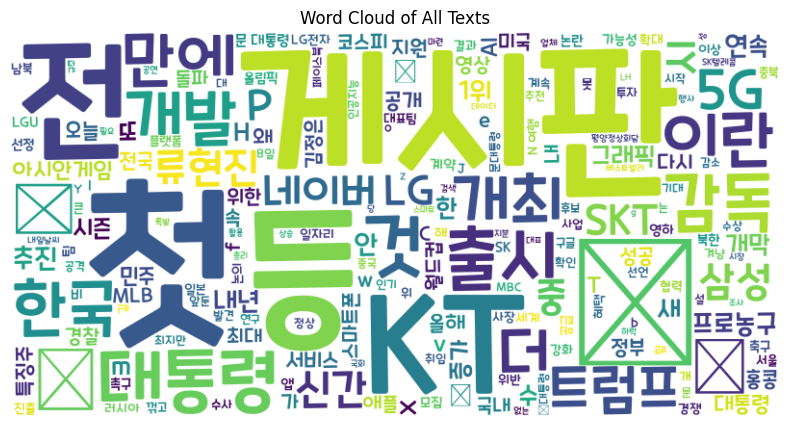

In [16]:

# 워드 클라우드 생성 (전체 데이터)
wordcloud = WordCloud(font_path='font1.ttf', width=800, height=400, background_color='white').generate(' '.join(df['cleaned_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Texts')
plt.show()


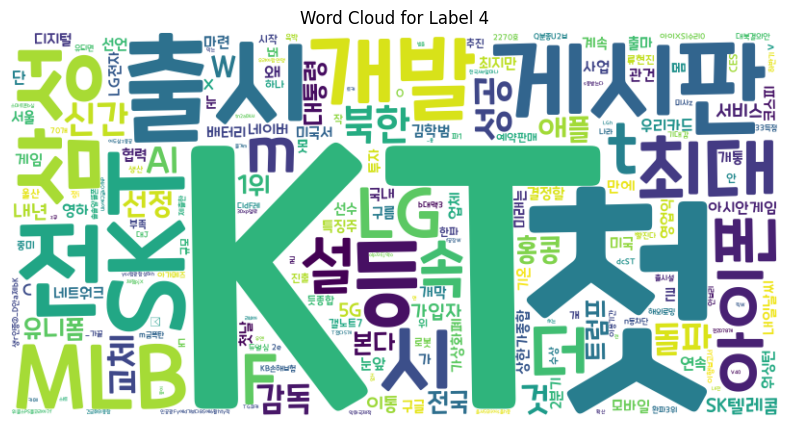

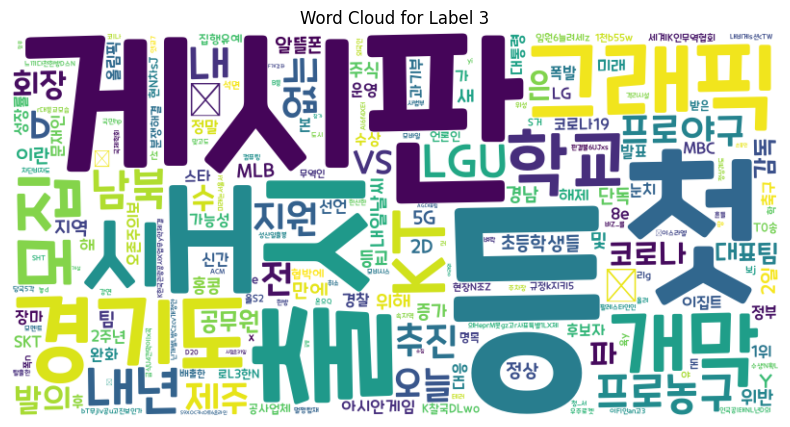

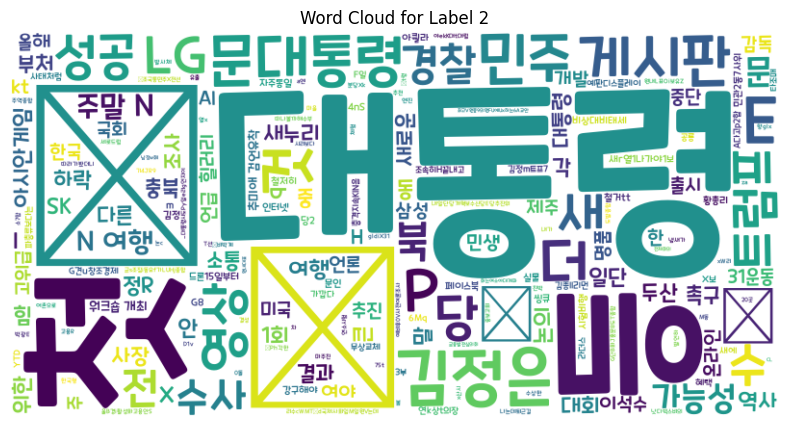

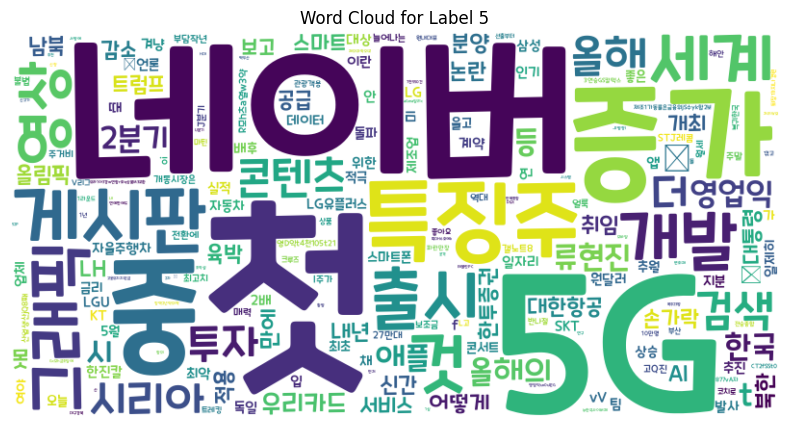

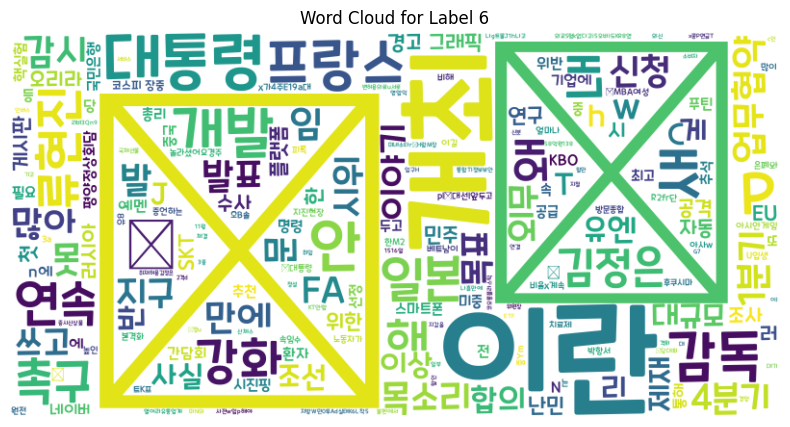

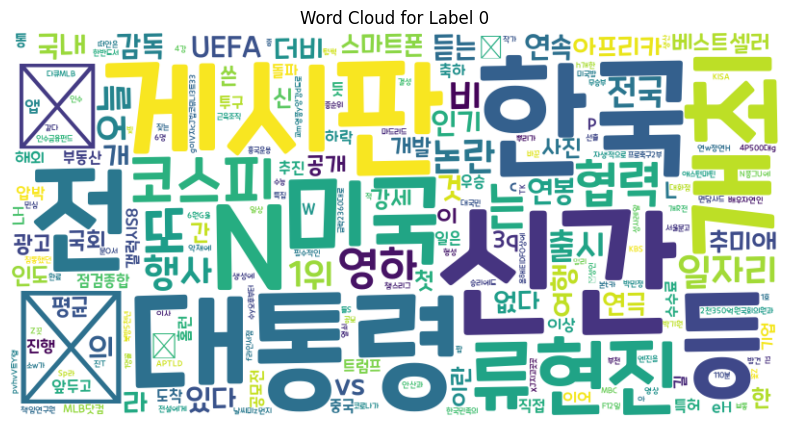

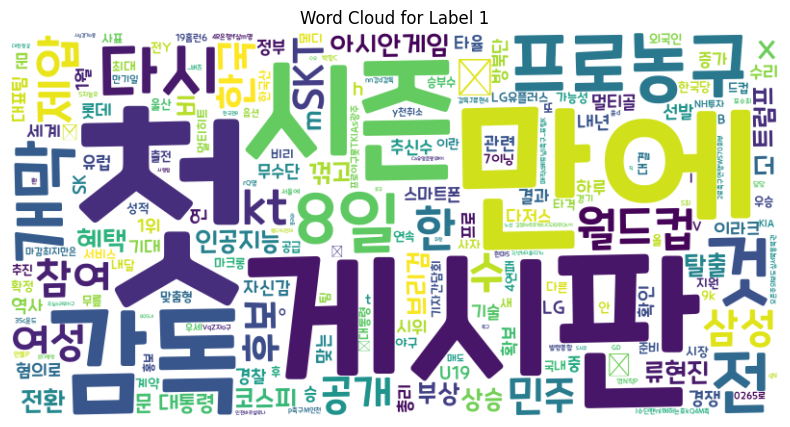

In [18]:

# 레이블별 워드 클라우드
for label in df['target'].unique():
    text = ' '.join(df[df['target'] == label]['cleaned_text'])
    wordcloud = WordCloud(font_path='font1.ttf', width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label {label}')
    plt.show()


In [ ]:
# 중복 데이터 확인
duplicates = df[df.duplicated(['text'])]
print(f"\nNumber of duplicate texts: {len(duplicates)}")



Number of duplicate texts: 0


In [21]:

# 레이블별 평균 텍스트 길이
avg_length_by_label = df.groupby('target')['text_length'].mean()
print("\nAverage text length by label:")
print(avg_length_by_label)



Average text length by label:
target
0    25.735516
1    28.190244
2    27.304124
3    26.563636
4    27.519704
5    26.897375
6    28.098734
Name: text_length, dtype: float64
